# Density-Based Clustering
## Objectives
*   Use DBSCAN to do Density based clustering
*   Use Folium to plot clusters


Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.

However, when applied to tasks with arbitrary shape clusters, or clusters within a cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor.
Additionally, Density-based clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.


In [1]:
import numpy as np 
from sklearn.cluster import DBSCAN 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Data generation

The function below will generate the data points and requires these inputs:

<ul>
    <li> <b>centroidLocation</b>: Coordinates of the centroids that will generate the random data. </li>
    <ul> <li> Example: input: [[4,3], [2,-1], [-1,4]] </li> </ul>
    <li> <b>numSamples</b>: The number of data points we want generated, split over the number of centroids (# of centroids defined in centroidLocation) </li>
    <ul> <li> Example: 1500 </li> </ul>
    <li> <b>clusterDeviation</b>: The standard deviation of the clusters. The larger the number, the further the spacing of the data points within the clusters. </li>
    <ul> <li> Example: 0.5 </li> </ul>
</ul>


In [2]:
def createDataPoints(centroidLocation, numSamples, clusterDeviation):
    # Create random data and store in feature matrix X and response vector y.
    X, y = make_blobs(n_samples=numSamples, centers=centroidLocation, 
                                cluster_std=clusterDeviation)
    
    # Standardize features by removing the mean and scaling to unit variance
    X = StandardScaler().fit_transform(X)
    return X, y

Use <b>createDataPoints</b> with the <b>3 inputs</b> and store the output into variables <b>X</b> and <b>y</b>.


In [3]:
X, y = createDataPoints([[4,3], [2,-1], [-1,4]] , 1500, 0.5)

### Modeling

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms  which works based on density of object.
The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

It works based on two parameters: Epsilon and Minimum Points\
**Epsilon** determine a specified radius that if includes enough number of points within, we call it dense area\
**minimumSamples** determine the minimum number of data points we want in a neighborhood to define a cluster.


In [4]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(X)
labels = db.labels_
labels

array([0, 0, 1, ..., 0, 1, 2])

In [5]:
labels.max()

2

### Distinguish outliers

Let's Replace all elements with 'True' in core_samples_mask that are in the cluster, 'False' if the points are outliers.


In [6]:
np.zeros_like(db.labels_, dtype=bool)

array([False, False, False, ..., False, False, False])

In [7]:
# Firts, create an array of booleans using the labels from db.
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
core_samples_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [8]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters_

3

In [9]:
# Remove repetition in labels by turning it into a set.
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2}

### Data visualization


In [10]:
# Create colors for the clusters.
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))


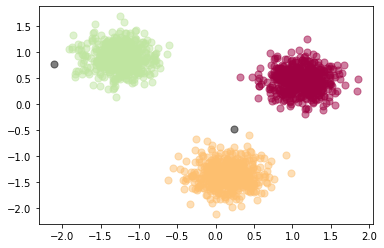

In [11]:
# Plot the points with colors
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    # Plot the datapoints that are clustered
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

    # Plot the outliers
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1],s=50, c=[col], marker=u'o', alpha=0.5)

## KMeans vs Dbscan

To better understand differences between partitional and density-based clustering, try to cluster the above dataset into 3 clusters using k-Means.\
Notice: do not generate data again, use the same dataset as above.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


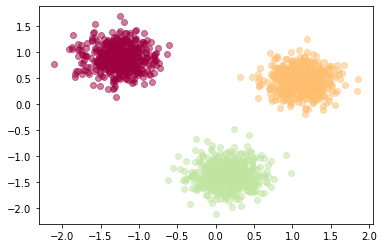

In [12]:
from sklearn.cluster import KMeans 
k = 3
k_means3 = KMeans(init = "k-means++", n_clusters = k, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(k), colors):
    my_members = (k_means3.labels_ == k)
    plt.scatter(X[my_members, 0], X[my_members, 1],  c=col, marker=u'o', alpha=0.5)
plt.show()

# Weather Station Clustering using DBSCAN
<hr>

DBSCAN is especially very good for tasks like class identification in a spatial context. The wonderful attribute of DBSCAN algorithm is that it can find out any arbitrary shape cluster without getting affected by noise. For example, this following example cluster the location of weather stations in Canada.<br>
DBSCAN can be used here, for instance, to find the group of stations which show the same weather condition. As you can see, it not only finds different arbitrary shaped clusters, can find the denser part of data-centered samples by ignoring less-dense areas or noises.

# About the dataset

<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
border: 1px solid #dddddd;
text-align: left;
padding: 8px;
}

tr:nth-child(even) {
background-color: #dddddd;
} </style>

</head>
<body>

<table>
  <tr>
    <th>Name in the table</th>
    <th>Meaning</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Station Name</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Latitude (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Longitude (West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Province</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Mean Temperature (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Days without Valid Mean Temperature</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Mean Temperature difference from Normal (1981-2010) (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Highest Monthly Maximum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Days without Valid Maximum Temperature</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Lowest Monthly Minimum Temperature (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Days without Valid Minimum Temperature</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Snowfall (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Days without Valid Snowfall</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Percent of Normal (1981-2010) Snowfall</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Total Precipitation (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Days without Valid Precipitation</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Percent of Normal (1981-2010) Precipitation</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Snow on the ground at the end of the month (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Number of days with Precipitation 1.0 mm or more</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Bright Sunshine (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Days without Valid Bright Sunshine</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Percent of Normal (1981-2010) Bright Sunshine</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Degree Days below 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Degree Days above 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Climate station identifier (first 3 digits indicate   drainage basin, last 4 characters are for sorting alphabetically).</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>

</table>

</body>
</html>


In [13]:
import pandas as pd
import numpy as np

url='https://github.com/mdimran1/Dataset/blob/main/weather-stations.csv?raw=true'

#Read csv
pdf = pd.read_csv(url)
pdf.head(5)

Stn_Name     Lat     Long Prov  ...  BS%    HDD  CDD   Stn_No
0               CHEMAINUS  48.935 -123.742   BC  ...  NaN  273.3  0.0  1011500
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  ...  NaN  307.0  0.0  1012040
2           LAKE COWICHAN  48.829 -124.052   BC  ...  NaN  168.1  0.0  1012055
3        DISCOVERY ISLAND  48.425 -123.226   BC  ...  NaN    NaN  NaN  1012475
4     DUNCAN KELVIN CREEK  48.735 -123.728   BC  ...  NaN  267.7  0.0  1012573

[5 rows x 25 columns]

#Cleaning

Let's remove rows that don't have any value in the **Tm** field.


In [14]:
pdf = pdf[pd.notnull(pdf["Tm"])]
pdf = pdf.reset_index(drop=True)
pdf.head(5)

Stn_Name     Lat     Long Prov  ...  BS%    HDD  CDD   Stn_No
0               CHEMAINUS  48.935 -123.742   BC  ...  NaN  273.3  0.0  1011500
1  COWICHAN LAKE FORESTRY  48.824 -124.133   BC  ...  NaN  307.0  0.0  1012040
2           LAKE COWICHAN  48.829 -124.052   BC  ...  NaN  168.1  0.0  1012055
3     DUNCAN KELVIN CREEK  48.735 -123.728   BC  ...  NaN  267.7  0.0  1012573
4       ESQUIMALT HARBOUR  48.432 -123.439   BC  ...  NaN  258.6  0.0  1012710

[5 rows x 25 columns]

# Visualization

Visualization of stations on map using basemap package. The matplotlib basemap toolkit is a library for plotting 2D data on maps in Python. Basemap does not do any plotting on it’s own, but provides the facilities to transform coordinates to a map projections.

Please notice that the size of each data points represents the average of maximum temperature for each station in a year.



## Interactive maps
Importing Folium modules for visualizing with latitude-and-longitude data in a map.
<br> For creating Interactive maps visualization with hover display option for station name.

In [15]:
# Import folium for cluster visualization in maps
import folium

# display maps cross user/browser agent
from IPython.display import display

llon=-140
ulon=-50
llat=40
ulat=65

pdf = pdf[(pdf['Long'] > llon) & (pdf['Long'] < ulon) & (pdf['Lat'] > llat) &(pdf['Lat'] < ulat)]

In [16]:
map_osm = folium.Map(
    location = [pdf['Lat'].mean(), pdf['Long'].mean()],
    zoom_start = 3.5
)
#You Markler the point in Map
for indice, row in pdf.iterrows():

  folium.CircleMarker(
    radius=3,
    tooltip = [row['Stn_Name']],
    location=[row["Lat"], row["Long"]],
    color="blue",
    fill=False,
).add_to(map_osm)

display(map_osm)


# Clustering of stations based on their location i.e. Lat & Lon

**DBSCAN** form sklearn library can run DBSCAN clustering from vector array or distance matrix. In our case, we pass it the Numpy array Clus_dataSet to find core samples of high density and expands clusters from them.


In [17]:
pdf.columns

Index(['Stn_Name', 'Lat', 'Long', 'Prov', 'Tm', 'DwTm', 'D', 'Tx', 'DwTx',
       'Tn', 'DwTn', 'S', 'DwS', 'S%N', 'P', 'DwP', 'P%N', 'S_G', 'Pd', 'BS',
       'DwBS', 'BS%', 'HDD', 'CDD', 'Stn_No'],
      dtype='object')

In [18]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['Lat','Long']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

In [19]:
pdf.Clus_Db.nunique()

7

In [20]:
pdf.Clus_Db.unique()

array([ 0, -1,  1,  2,  3,  5,  4])

In [21]:
# Remove repetition in labels by turning it into a set 
# for counting cluster without outliers.
len(set(pdf.Clus_Db)) - (1 if -1 in labels else 0)

6

As  outliers, the cluster label is -1


## Visualization of clusters based on location

Now, we can visualize the clusters using Folium :


In [22]:
# assigning folium class
map_osm = folium.Map(
    location = [pdf['Lat'].mean(), pdf['Long'].mean()],
    zoom_start = 3.5
)
# color assigning by hex values :
colors = ['#ab8b33','#99ff99','#0099ff','#669999','#cccc00','#9933ff','red']
 
def colorCall(val):
  val = int(val)
  return colors[val]


for indice, row in pdf.iterrows():  # looping all station locations
    folium.CircleMarker(  # Make Marker point in Map
    radius=3,
    tooltip = [row['Stn_Name']],
    location=[row["Lat"], row["Long"]],
    color= colorCall(row['Clus_Db']),
    fill=True,
).add_to(map_osm)
display(map_osm)

# Clustering of stations based on their location, mean, max, and min Temperature

re-run DBSCAN on a 5-dimensional dataset:


In [23]:
from sklearn.cluster import DBSCAN
import sklearn.utils
from sklearn.preprocessing import StandardScaler
sklearn.utils.check_random_state(1000)
Clus_dataSet = pdf[['Lat','Long','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
pdf["Clus_Db"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
pdf[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

Stn_Name    Tx   Tm  Clus_Db
0               CHEMAINUS  13.5  8.2        0
1  COWICHAN LAKE FORESTRY  15.0  7.0        0
2           LAKE COWICHAN  16.0  6.8        0
3     DUNCAN KELVIN CREEK  14.5  7.7        0
4       ESQUIMALT HARBOUR  13.1  8.8        0

In [24]:
pdf.Clus_Db.value_counts()

-1    431
 5    260
 3    218
 0    151
 4     51
 1     20
 2     17
 6     15
 7     14
 8     12
Name: Clus_Db, dtype: int64

## Visualization of clusters based on location and Temperture


In [25]:
map_osm = folium.Map(
    location = [pdf['Lat'].mean(), pdf['Long'].mean()],
    zoom_start = 4
)

colors = ['green','blue','white','Orange','Grey','yellow','purple','grey','olive','red']
 
def colorCall(val):
  val = int(val)
  return colors[val]
for indice, row in pdf.iterrows() :

#You Marker the point in Map
  folium.CircleMarker(
    radius=3,
    tooltip = [row['Stn_Name']],
    location=[row["Lat"], row["Long"]],
    fill=False,
    color= colorCall(row['Clus_Db']),
    opacity=0.9
).add_to(map_osm)

display(map_osm)

In [26]:
pdf.Clus_Db.value_counts()

-1    431
 5    260
 3    218
 0    151
 4     51
 1     20
 2     17
 6     15
 7     14
 8     12
Name: Clus_Db, dtype: int64